# Dual Plane Analysis

### Notebook for processing and analyzing dual plane somatic and dendritic recordings

In [1]:
import os
import numpy as np
from Lab_Analyses.Spine_Analysis.preprocess_dual_plane_data import organize_dual_plane_soma_dend_data
from Lab_Analyses.Spine_Analysis.analyze_dual_plane_data import analyze_dual_plane_data
from Lab_Analyses.Utilities.save_load_pickle import load_pickle, save_pickle
%matplotlib notebook

### Datasets
Specify which mice to be analyzed

In [2]:
# Mouse ids
id_1 = "JW129"
id_2 = "JW130"

mouse_list = [id_1, id_2]


### Preprocessing
Preprocess the dual plane data

In [3]:
# Reprocess?
reprocess = True

# Inputs
data_dir = "two_plane"
file_types = {"Dendrite": "dendrite", "Soma": "soma"}

# Preprocess data
if reprocess:
    for mouse in mouse_list:
        organize_dual_plane_soma_dend_data(mouse_id=mouse, data_dir=data_dir, file_types=file_types, save=True)

['JW129_two_plane_dendrite_imaging_data.pickle', 'JW129_two_plane_soma_imaging_data.pickle']
Dendrite: C:\Users\Jake\Desktop\Analyzed_data\individual\JW129\imaging\two_plane\FOV1\JW129_two_plane_dendrite_imaging_data.pickle
Soma: C:\Users\Jake\Desktop\Analyzed_data\individual\JW129\imaging\two_plane\FOV1\JW129_two_plane_soma_imaging_data.pickle
['JW130_two_plane_dendrite_imaging_data.pickle', 'JW130_two_plane_soma_imaging_data.pickle']
Dendrite: C:\Users\Jake\Desktop\Analyzed_data\individual\JW130\imaging\two_plane\FOV1\JW130_two_plane_dendrite_imaging_data.pickle
Soma: C:\Users\Jake\Desktop\Analyzed_data\individual\JW130\imaging\two_plane\FOV1\JW130_two_plane_soma_imaging_data.pickle


### Analyze dual plane data

In [4]:
# Save path
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
experiment_dir = "Dual_Spine_Imaging"
dual_plane_dir = "Dual_Plane"
dual_plane_path = os.path.join(group_path, experiment_dir, dual_plane_dir)

# Analyze
reanalyze = True
if reanalyze:
    dual_plane_data = analyze_dual_plane_data(mouse_list, save=True, save_path=dual_plane_path)
else:
    dual_plane_data = load_pickle(["dual_plane_soma_dendrite_activity_data"], path=dual_plane_path)

### Visualize Data

In [5]:
# Set up figure save path
initial_path = r"C:\Users\Jake\Desktop\Figures\grouped_data"
fig_path = os.path.join(initial_path, experiment_dir, dual_plane_dir)
if not os.path.isdir(fig_path):
    os.makedirs(fig_path)

<IPython.core.display.Javascript object>


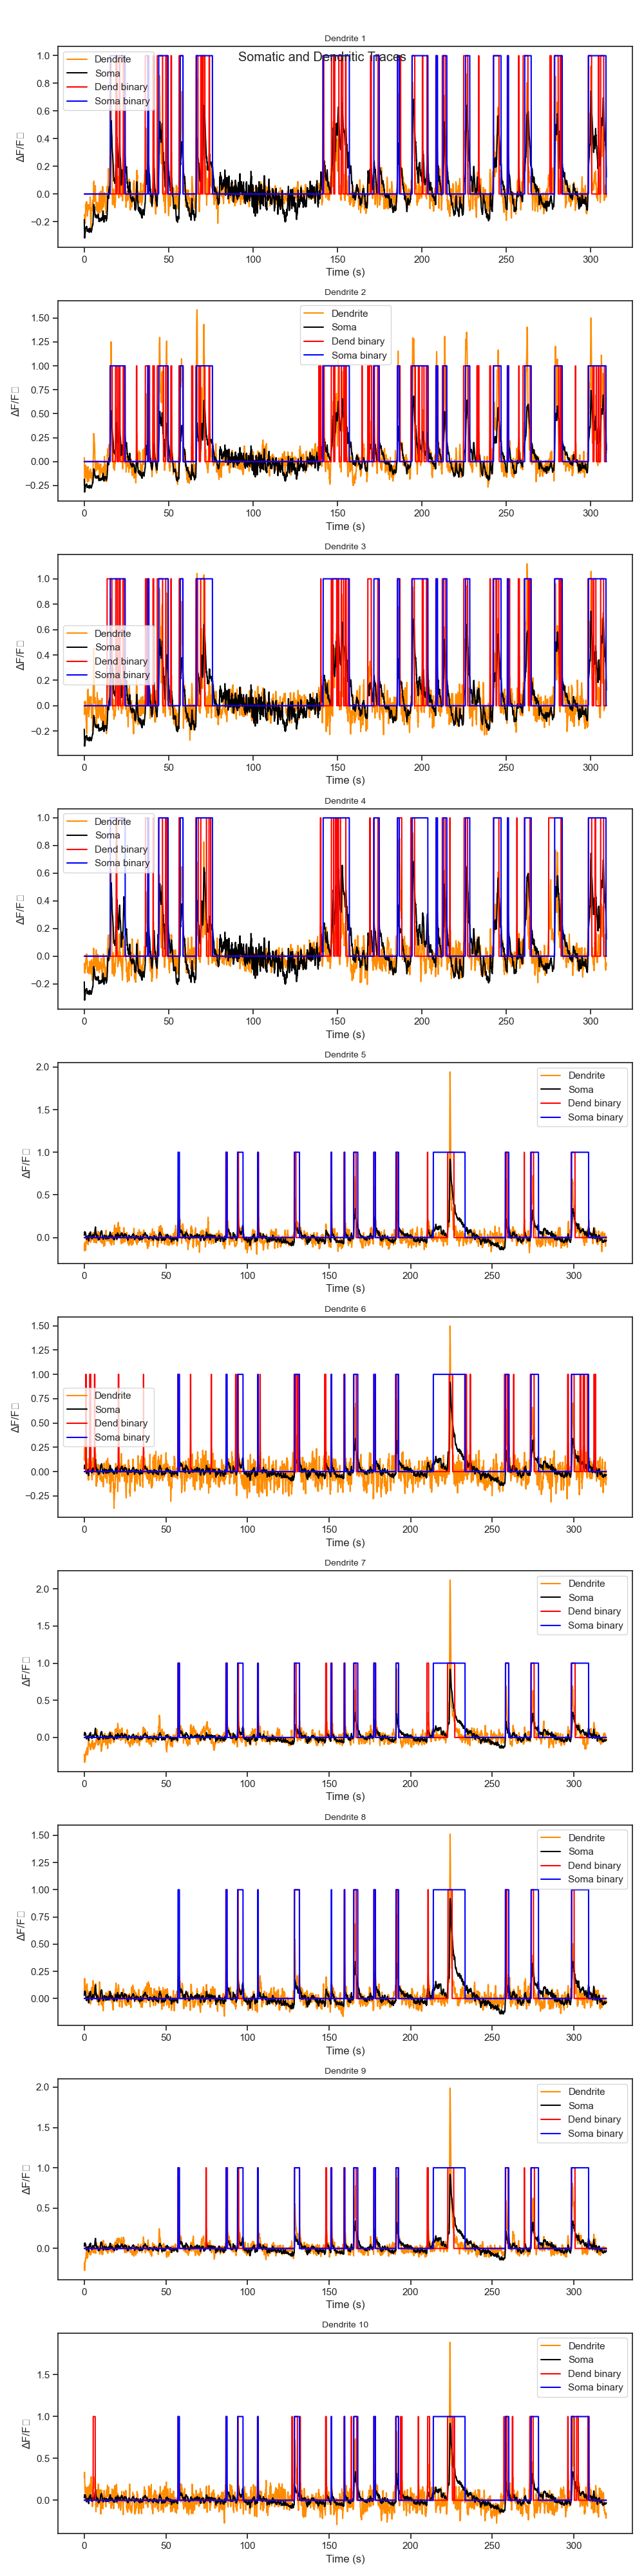

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=flags)


In [7]:
# Plot soma and dendrite traces
dual_plane_data.plot_soma_dend_traces(norm=False, plot_binary=True, subselect=None, save=False, save_path=fig_path)

<IPython.core.display.Javascript object>


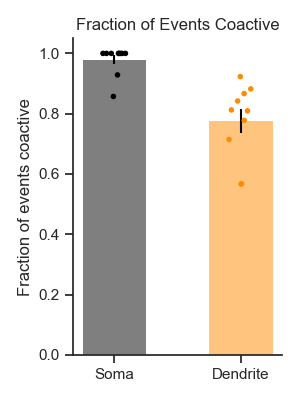

In [8]:
# Plot fraction of events coactive
dual_plane_data.plot_fraction_coactive(mean_type="mean", err_type="sem", save=False, save_path=fig_path)

<IPython.core.display.Javascript object>


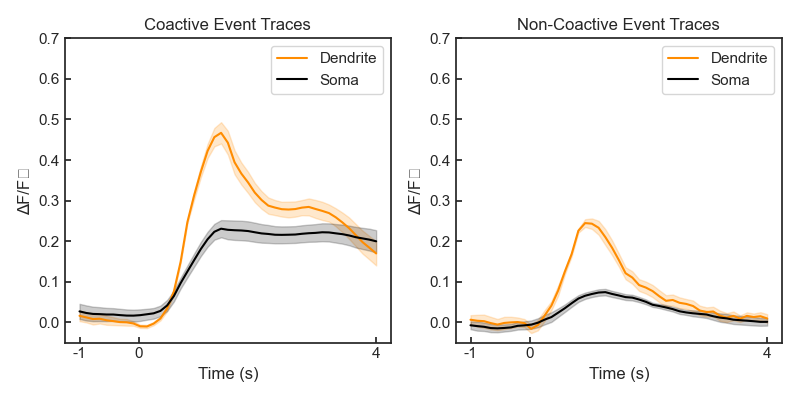

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=flags)


In [11]:
# Plot traces that are coactive and those that are not
dual_plane_data.plot_coactive_noncoactive_traces(norm=False, avg_type="Dend", save=False, save_path=fig_path)

<IPython.core.display.Javascript object>


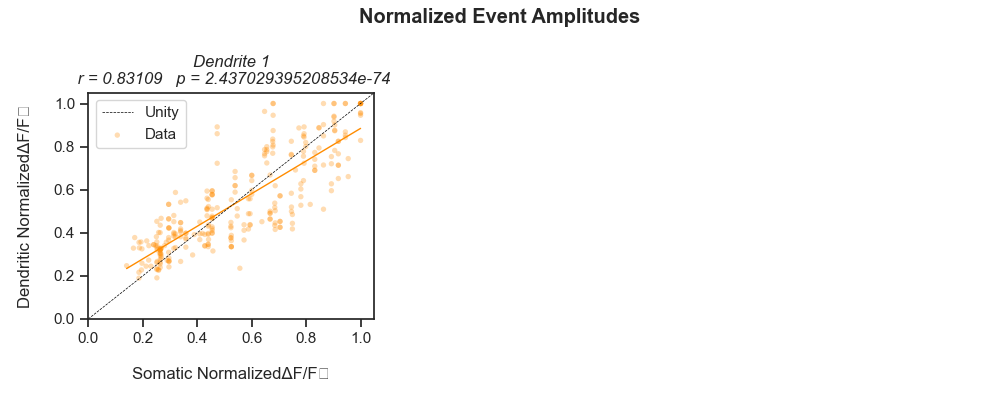

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=flags)


In [18]:
# Plot correlations between soma and dendrites

## Select data type to plot (amplitude, amplitude_norm, tau, tau_norm)
data_type = "amplitude_norm"

## Plot
dual_plane_data.plot_between_correlations(data_type=data_type, individual=False, save=False, save_path=fig_path)

<IPython.core.display.Javascript object>


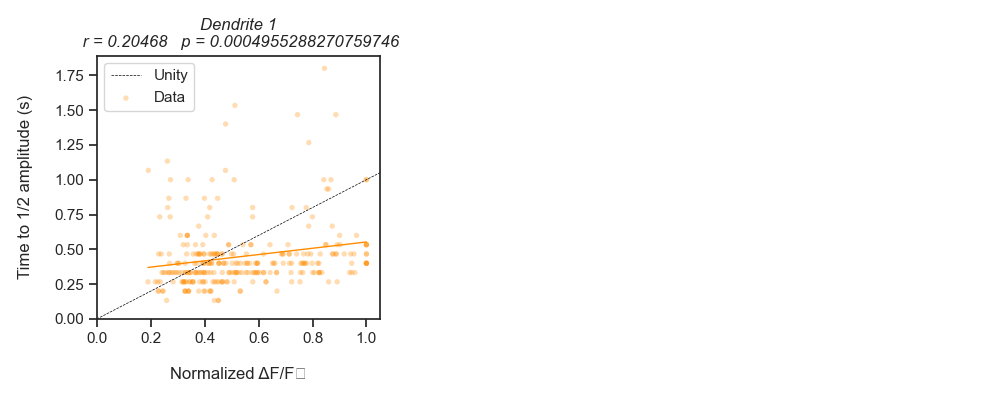

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8320 missing from current font.
  font.set_text(s, 0.0, flags=flags)


In [22]:
# Plot correlations between variables within same roi type

## Select group type to plot (Soma, Dendrite)
group_type = "Dendrite"

## Plot
dual_plane_data.plot_within_correlations(group_type=group_type, norm=True, individual=False, save=False, save_path=fig_path)